<a href="https://colab.research.google.com/github/damlakaynarca/Makale-Uygulama-veri-madencili-i/blob/main/%C4%B0leri_Veri_Madencili%C4%9Fi_Final_%C3%96devi_Confusion_Matrix_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 2.0 MB/s eta 0:00:00

Random Forest ile Secilen Ozelliklerle Performans:


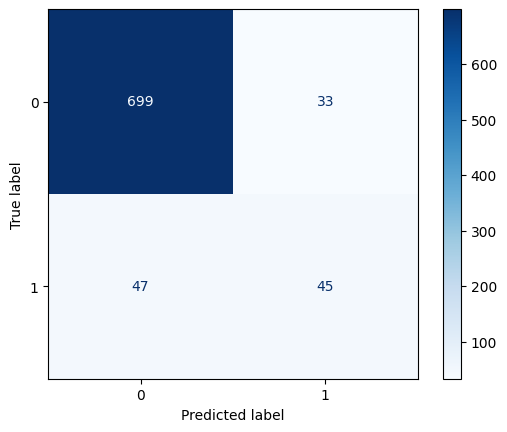

Random Forest: Dogruluk = 0.9029, Kappa = 0.4757


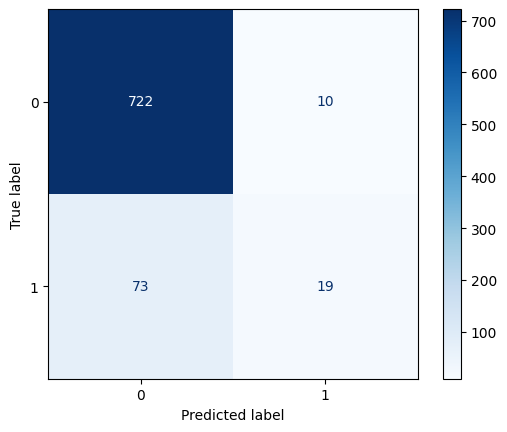

SVM: Dogruluk = 0.8993, Kappa = 0.2753


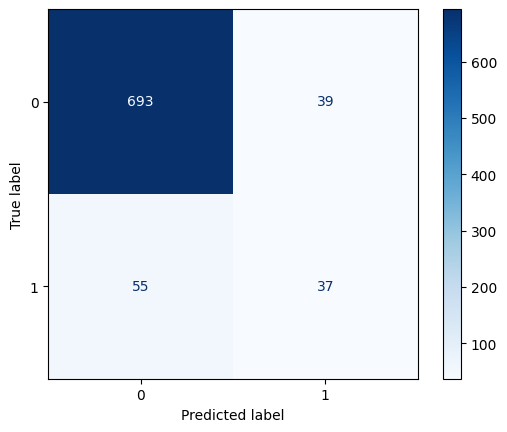

KNN: Dogruluk = 0.8859, Kappa = 0.3776


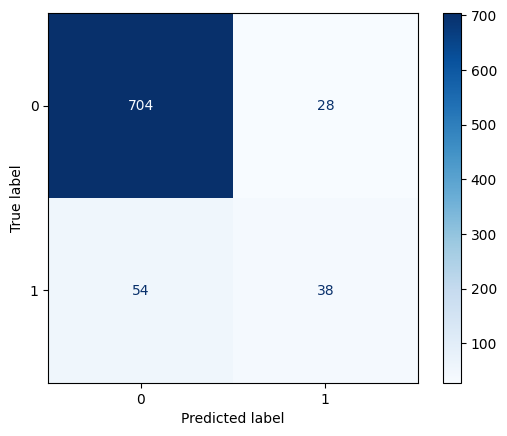

LDA: Dogruluk = 0.9005, Kappa = 0.4276


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


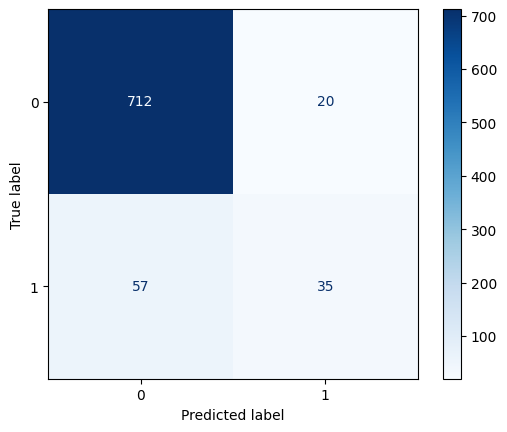

Lojistik Regresyon: Dogruluk = 0.9066, Kappa = 0.4284


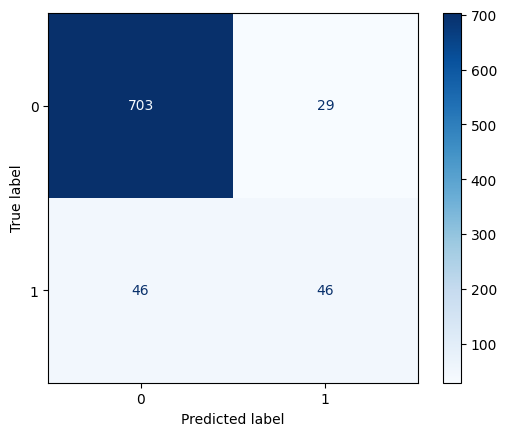

Gradient Boosting: Dogruluk = 0.9090, Kappa = 0.5008


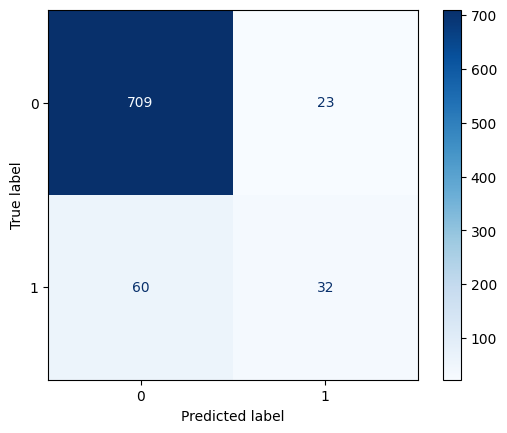

AdaBoost: Dogruluk = 0.8993, Kappa = 0.3839


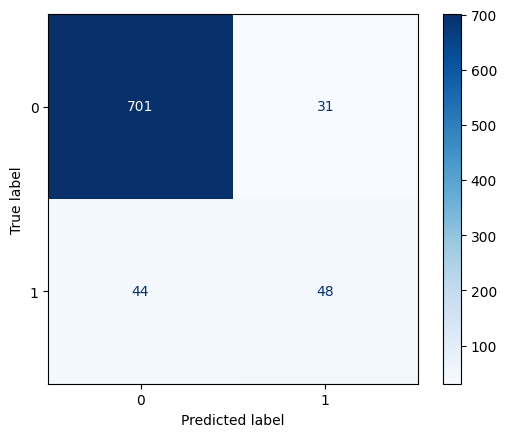

XGBoost: Dogruluk = 0.9090, Kappa = 0.5110

Boruta ile Secilen Ozelliklerle Performans:


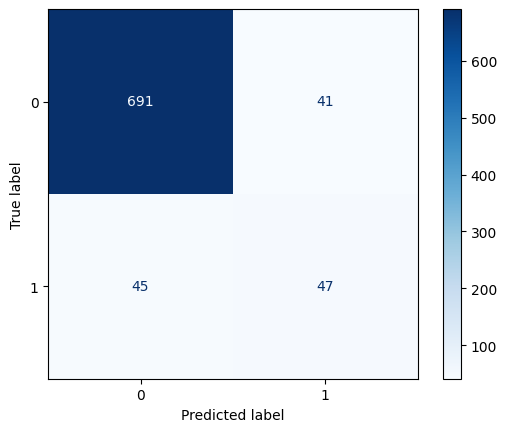

Random Forest: Dogruluk = 0.8956, Kappa = 0.4637


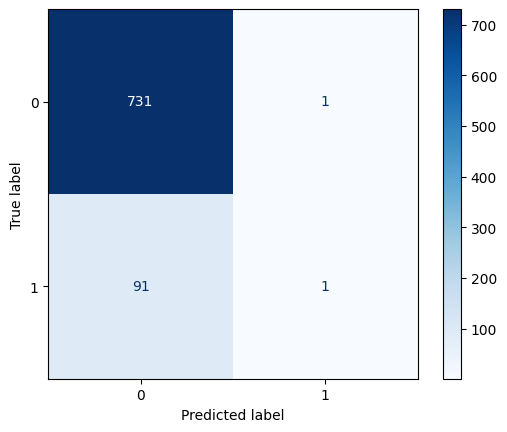

SVM: Dogruluk = 0.8883, Kappa = 0.0166


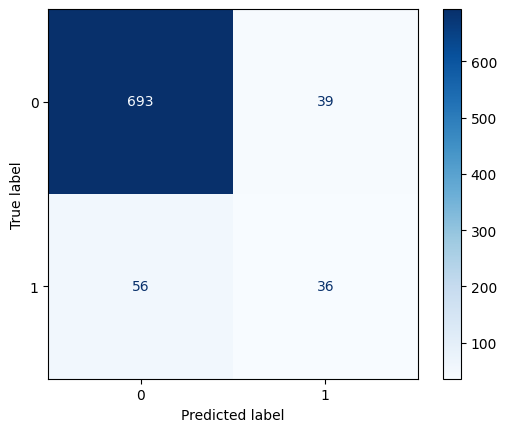

KNN: Dogruluk = 0.8847, Kappa = 0.3677


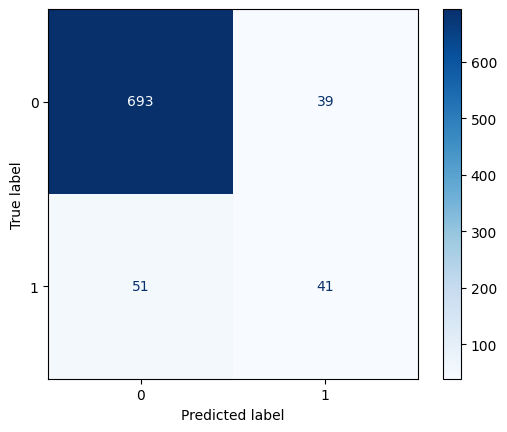

LDA: Dogruluk = 0.8908, Kappa = 0.4161


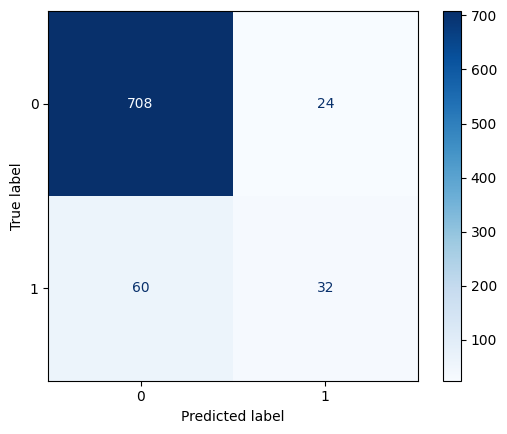

Lojistik Regresyon: Dogruluk = 0.8981, Kappa = 0.3801


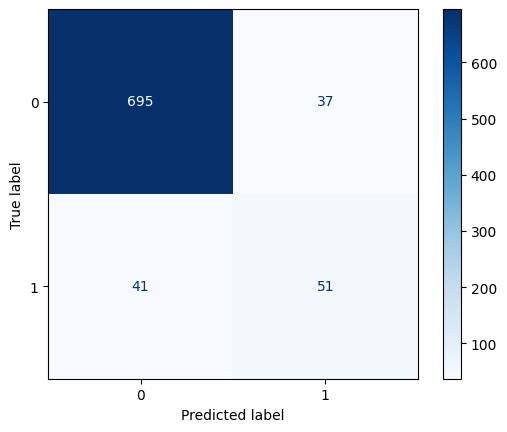

Gradient Boosting: Dogruluk = 0.9053, Kappa = 0.5136


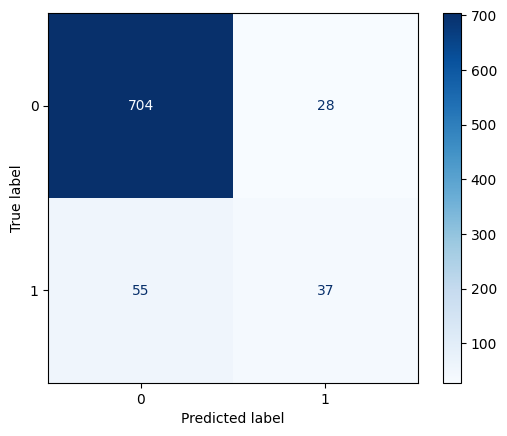

AdaBoost: Dogruluk = 0.8993, Kappa = 0.4175


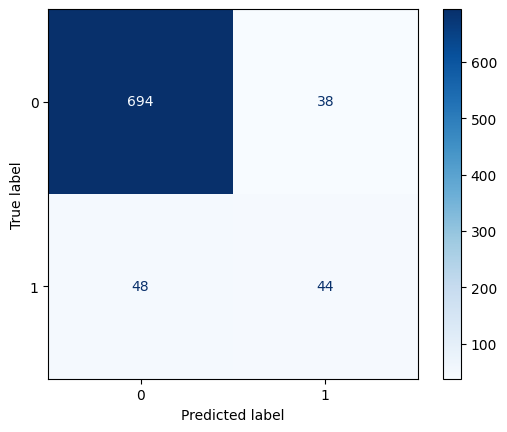

XGBoost: Dogruluk = 0.8956, Kappa = 0.4476

RFE ile Secilen Ozelliklerle Performans:


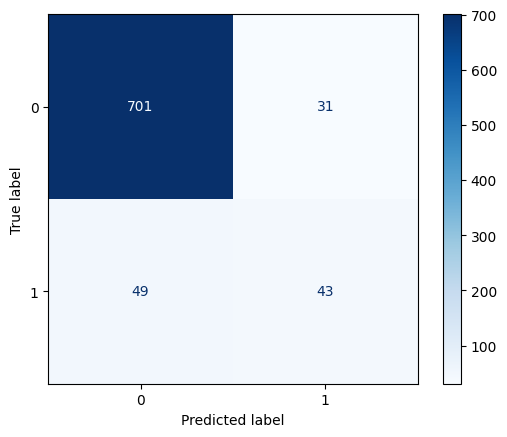

Random Forest: Dogruluk = 0.9029, Kappa = 0.4648


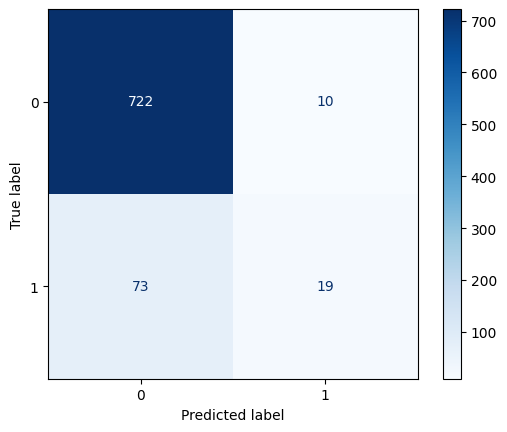

SVM: Dogruluk = 0.8993, Kappa = 0.2753


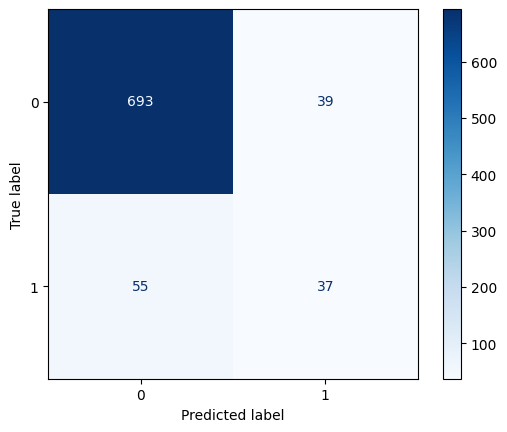

KNN: Dogruluk = 0.8859, Kappa = 0.3776


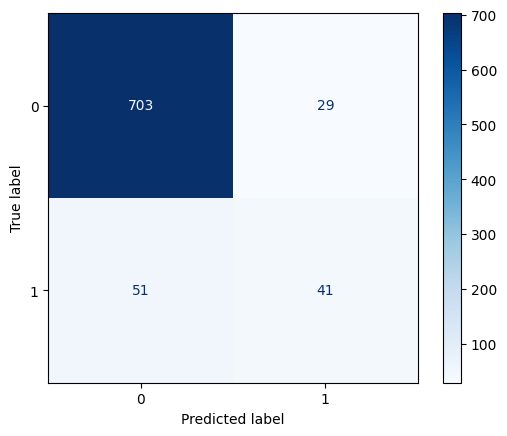

LDA: Dogruluk = 0.9029, Kappa = 0.4534


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


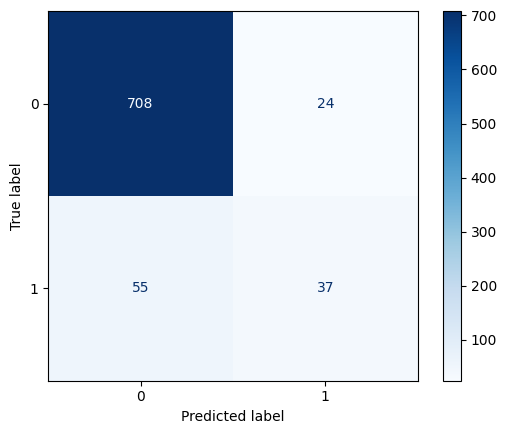

Lojistik Regresyon: Dogruluk = 0.9041, Kappa = 0.4332


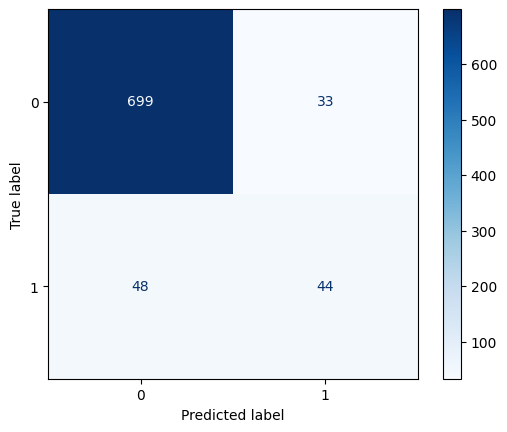

Gradient Boosting: Dogruluk = 0.9017, Kappa = 0.4664


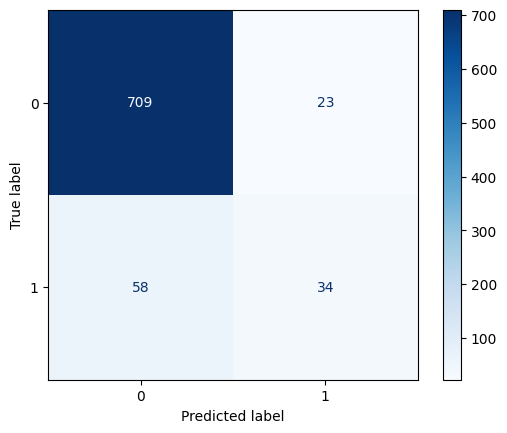

AdaBoost: Dogruluk = 0.9017, Kappa = 0.4056


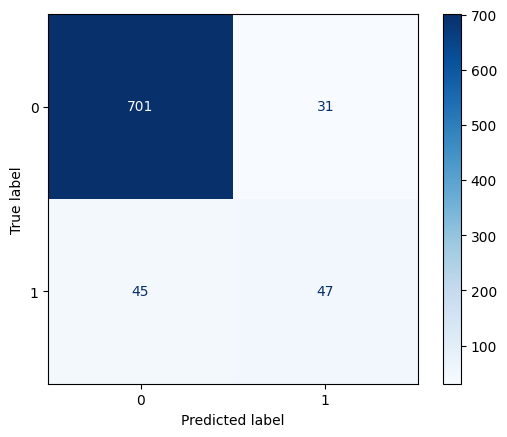

XGBoost: Dogruluk = 0.9078, Kappa = 0.5019


In [ ]:
# Gerekli Kutuphanelerin Yuklenmesi
!pip install boruta
import pandas as pd
import numpy as np
import requests  # Eksik kutuphane importu
import zipfile
import io
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier  # Eksik importlar
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay
from boruta import BorutaPy
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier  # Eksik import

# Veri yukleme islemleri (ornek veri seti: Bank Marketing)
data_urls = {
    'bank_marketing': 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip',
    'car_evaluation': 'https://archive.ics.uci.edu/ml/machine-learning-databases/00447/car.data',
    'human_activity': 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/HAR.csv'
}

# Ornek olarak Bank Marketing veri seti
data_url = data_urls['bank_marketing']
response = requests.get(data_url)  # Veriyi indirmek icin requests kullaniliyor
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    with z.open('bank-additional/bank-additional.csv') as f:
        data = pd.read_csv(f, sep=';', header=0)

# Veri Hazirlama (Bank Marketing)
X = data.drop('y', axis=1)  # Hedef sutunu kaldirma
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Binary encoding
X = pd.get_dummies(X)  # Kategorik degiskenleri sayisallastirma

# Egitim ve Test Kumeleri
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ozellik Secimi - Random Forest ile Ozellik Onemi
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_egitim, y_egitim)
feature_onem = rf_model.feature_importances_
onemli_ozellikler_rf = X_egitim.columns[feature_onem > np.mean(feature_onem)]

# Boruta ile Ozellik Secimi
boruta_model = BorutaPy(rf_model, n_estimators='auto', verbose=0, random_state=42)
boruta_model.fit(X_egitim.values, y_egitim.values)
onemli_ozellikler_boruta = X_egitim.columns[boruta_model.support_]

# RFE (Recursive Feature Elimination) ile Ozellik Secimi
from sklearn.feature_selection import RFE  # RFE import edilmesi gerekiyor
rfe_model = RFE(rf_model, n_features_to_select=10)
rfe_model.fit(X_egitim, y_egitim)
onemli_ozellikler_rfe = X_egitim.columns[rfe_model.support_]

# Model Egitimi ve Degerlendirme
modeller = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', C=1, gamma='scale'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'LDA': LinearDiscriminantAnalysis(),
    'Lojistik Regresyon': LogisticRegression(max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier()
}

# Fonksiyon: Model Performansini Degerlendirme
def modeli_degerlendir(model, X_egitim, X_test, y_egitim, y_test):
    model.fit(X_egitim, y_egitim)
    y_tahmin = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_tahmin)
    kappa = cohen_kappa_score(y_test, y_tahmin)
    cm = confusion_matrix(y_test, y_tahmin)
    cm_goruntu = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    cm_goruntu.plot(cmap='Blues')
    plt.show()
    return dogruluk, kappa

# Secilen Ozelliklerle Modellerin Performansi
for yontem, ozellikler in zip(['Random Forest', 'Boruta', 'RFE'],
                             [onemli_ozellikler_rf, onemli_ozellikler_boruta, onemli_ozellikler_rfe]):
    print(f"\n{yontem} ile Secilen Ozelliklerle Performans:")
    for model_adi, model in modeller.items():
        dogruluk, kappa = modeli_degerlendir(model, X_egitim[ozellikler], X_test[ozellikler], y_egitim, y_test)
        print(f"{model_adi}: Dogruluk = {dogruluk:.4f}, Kappa = {kappa:.4f}")
